In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm

In [2]:
# 중산층 소비자 층 데이터

pd.read_csv('./data/middle.csv').head()

,food,book,cul,cloth,travel,status
0,0.263017,0.759435,0.472159,0.365709,0.331119,1
1,0.192398,0.514150,0.222987,0.388257,0.307846,1
2,0.513997,0.448345,0.554666,0.394886,0.363455,0
3,0.387733,0.582956,0.425999,0.349615,0.197456,1
4,0.421674,0.560781,0.430536,0.734413,0.352037,0


In [3]:
middle = pd.read_csv('./data/middle.csv')

In [4]:
# 컬럼 단위가 다르므로
# 데이터 정규화 진행

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [5]:
scaler.fit(middle)

StandardScaler()

In [7]:
middle_regu = scaler.transform(middle)
middle_regu.shape, type(middle_regu)

array([[-6.79490582e-01,  2.85452572e-01,  7.69363065e-01,
        -3.92848549e-01,  1.16109560e+00,  6.70280063e-01],
       [-1.36649081e+00, -7.93115937e-01, -1.70438786e+00,
        -1.77986086e-01,  7.31897271e-01,  6.70280063e-01],
       [ 1.76207947e+00, -1.08247293e+00,  1.58847972e+00,
        -1.14819268e-01,  1.75741834e+00, -1.49191369e+00],
       [ 5.33770153e-01, -4.90560785e-01,  3.11090235e-01,
        -5.46207407e-01, -1.30388542e+00,  6.70280063e-01],
       [ 8.63949841e-01, -5.88070095e-01,  3.56134286e-01,
         3.12053813e+00,  1.54685944e+00, -1.49191369e+00],
       [-9.55034863e-01, -6.56679973e-01,  1.03540717e-02,
         7.84325978e-01,  1.43126140e-01,  6.70280063e-01],
       [-1.04290710e+00,  3.24664723e-01,  1.94243500e-01,
         8.05043535e-02, -1.40235462e+00,  6.70280063e-01],
       [-5.31724583e-02,  4.88510281e-01,  9.15523136e-01,
         2.84851975e-01,  7.49844332e-01,  6.70280063e-01],
       [-2.19010248e-01,  3.83124161e-01,  3.967

In [8]:
middle_regu = pd.DataFrame(middle_regu)
middle_regu.columns = ['food', 'book', 'cul', 'cloth', 'travle', 'status']
middle_regu.head()

,food,book,cul,cloth,travle,status
0,-0.679491,0.285453,0.769363,-0.392849,1.161096,0.670280
1,-1.366491,-0.793116,-1.704388,-0.177986,0.731897,0.670280
2,1.762079,-1.082473,1.588480,-0.114819,1.757418,-1.491914
3,0.533770,-0.490561,0.311090,-0.546207,-1.303885,0.670280
4,0.863950,-0.588070,0.356134,3.120538,1.546859,-1.491914


In [10]:
# 훈련용, 테스트 데이터 분류, y는 target data임

x = middle_regu.iloc[:,:-1].values
y = middle_regu.iloc[:,-1].values

In [15]:
x, x.shape, len(middle_regu), y, y.shape

(array([[-6.79490582e-01,  2.85452572e-01,  7.69363065e-01,
         -3.92848549e-01,  1.16109560e+00],
        [-1.36649081e+00, -7.93115937e-01, -1.70438786e+00,
         -1.77986086e-01,  7.31897271e-01],
        [ 1.76207947e+00, -1.08247293e+00,  1.58847972e+00,
         -1.14819268e-01,  1.75741834e+00],
        [ 5.33770153e-01, -4.90560785e-01,  3.11090235e-01,
         -5.46207407e-01, -1.30388542e+00],
        [ 8.63949841e-01, -5.88070095e-01,  3.56134286e-01,
          3.12053813e+00,  1.54685944e+00],
        [-9.55034863e-01, -6.56679973e-01,  1.03540717e-02,
          7.84325978e-01,  1.43126140e-01],
        [-1.04290710e+00,  3.24664723e-01,  1.94243500e-01,
          8.05043535e-02, -1.40235462e+00],
        [-5.31724583e-02,  4.88510281e-01,  9.15523136e-01,
          2.84851975e-01,  7.49844332e-01],
        [-2.19010248e-01,  3.83124161e-01,  3.96799407e-01,
         -1.13684875e+00, -1.00538045e+00],
        [ 1.16507338e-01,  1.10917815e+00,  6.44628679e-01,
    

In [16]:
model = svm.SVR()
model.fit(x,y)

SVR()

In [17]:
# 모델 평가 : 결정계수 계산

r2 = model.score(x,y)
print('결정계수:',r2)
# 결과 해석 : 60.8% 설명

결정계수: 0.6082849462996813


In [19]:
# 예측(predict())
model.predict(x)

array([ 0.56993569,  0.56992618, -1.3914263 ,  0.56998796, -1.39142763,
        0.71592487,  0.77011932,  0.66703907,  0.77022851,  0.71253406,
        0.4954    ,  0.39822166,  0.57036461,  0.4186803 , -0.42328262,
        0.39049966,  0.63093923, -0.57778858,  0.50612567,  0.57051108,
       -0.51928042, -0.71949385,  0.78589495,  0.09261325, -0.52423767,
        0.2559537 ,  0.35639129,  0.27140028,  0.7774531 ,  0.57023969,
        0.66199603,  0.67474064,  0.60019671,  0.29088444, -1.39180831,
        0.8545193 ,  0.61631004,  0.5700896 ,  0.6948072 , -0.22550127,
        0.73057197, -1.33165291,  0.54247205, -0.07889137,  0.41913133,
       -1.26409879,  0.56992614, -0.77724699,  0.57036974,  0.61169109,
        0.43292995, -0.15854389, -0.33682513,  0.64039809, -0.42166797,
        0.57001225,  0.94516842, -1.14421603, -0.76090614, -0.15583567,
       -1.39208731,  0.68260442, -0.54549232,  0.57065237,  0.57055183,
       -0.90643355,  0.7699616 ,  0.57013276,  0.49595586,  0.04

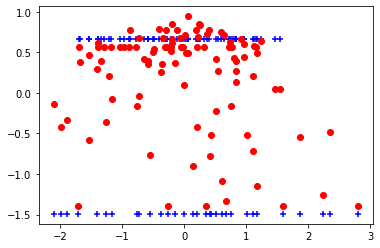

In [18]:
# 모델 예측 - 시각화 설명

plt.scatter(x[:,2], y, marker='+',c='b')  # 실제값 : blue
plt.scatter(x[:,2], model.predict(x) , marker='o',c='r')  # 예측값 : red
plt.show()

In [21]:
# 모델이 예측한 값이 0 이상인 예측값 추출
pred_list = list(model.predict(x) > 0)

In [23]:
# 실제값 
origin_list = list(middle.status == 1)

In [24]:
# 예측값과 실제값 비교 >> 같을수록 좋은 모델 : 95% 일치를 보임

sum([pred_list[i] == origin_list[i] for i in range(len(pred_list))]) / len(pred_list)

0.95